In [2]:
import pylab as plt
import numpy as np
from astropy.io import fits
import matplotlib as mpl
import math
import astropy.io.fits as fits
from astropy.table import Table 

In [3]:
df=Table(fits.getdata ('/Users/mgkadrmas/research/LMCParallaxREDO.fits'))

In [4]:
print(df['dec'])

   dec [26]   
--------------
-80.0 .. -55.0
-80.0 .. -55.0
-80.0 .. -55.0
-80.0 .. -55.0
-80.0 .. -55.0
-80.0 .. -55.0
-80.0 .. -55.0
-80.0 .. -55.0
-80.0 .. -55.0
-80.0 .. -55.0
           ...
-80.0 .. -55.0
-80.0 .. -55.0
-80.0 .. -55.0
-80.0 .. -55.0
-80.0 .. -55.0
-80.0 .. -55.0
-80.0 .. -55.0
-80.0 .. -55.0
-80.0 .. -55.0
-80.0 .. -55.0
-80.0 .. -55.0
Length = 56 rows


In [9]:
def onclick(event):
    print('%s click: button=%d, x=%d, y=%d, xdata=%f, ydata=%f' %
          ('double' if event.dblclick else 'single', event.button,
           event.x, event.y, event.xdata, event.ydata))

5

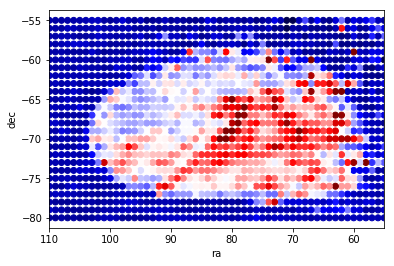

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel('ra')
ax.set_ylabel('dec')
ax.set_xlim([110,55])
sc = ax.scatter(df['ra'],df['dec'],c=1/df['parallax'], vmax=75, vmin=0, cmap=plt.cm.seismic)
fig.canvas.mpl_connect('button_press_event', onclick)


In [11]:
def roi_cut(xcut,ycut,x,y):
    """
    xcut : numpy array
         Array of x-values for the cut
    ycut : numpy array
         Array of y-values for the cut
    x : numpy array or list
         Array of input x-values to be cut
    y : numpy array or list
         Array of input y-values to be cut

    Returns
    ind : numpy array
       The indices of values OUTSIDE the cut
    cutind : 
       The indices of values INSIDE the cut

    """

    from matplotlib.path import Path
    tupVerts = list(zip(xcut,ycut))
    points = np.vstack((x,y)).T
    p = Path(tupVerts) # make a polygon
    inside = p.contains_points(points)
    ind, = np.where(~inside)
    cutind, = np.where(inside)

    return ind, cutind
    print (ind, cutind)

In [17]:
xcut=[102.237903,99.022177,95.584677,90.372984,85.715726,75.625000,71.189516,67.752016,63.981855,62.207661,59.879032,58.770161,57.217742,56.219758,59.213710,63.870968,71.522177,78.840726,87.046371,93.256048,100.020161,103.014113,104.012097]
ycut=[-64.938814,-63.151940,-61.439520,-59.801552,-58.312490,-58.238037,-58.461396,-59.429286,-60.173817,-62.109597,-65.385533,-68.512562,-71.490685,-75.138886,-76.851306,-77.893650,-78.489274,-78.191462,-78.191462,-77.521384,-75.362245,-72.458575,-68.438109]
x=df['ra']
y=df['dec']

(ind, cutind) = roi_cut(xcut,ycut,x,y)
      

ValueError: Points must be Nx2 array, got 26x112